In [15]:
from issues import Issues

repos = ['mvp-icap-service', 'mvp-icap-cloud', 'mvp-icap-squid-cache-proxy',
         'rebuild-k8s-filetypedetection', 'icap-performance-tests', 'rebuild-k8s', 'c-icap', 'k8-glasswall-rebuild',
         'k8-data-visualization']

issues = Issues(repos)

df = issues.get_df()
df.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,labels,state,locked,assignee,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,user.login,user.id,user.node_id,user.avatar_url,user.gravatar_id,user.url,user.html_url,user.followers_url,user.following_url,user.gists_url,user.starred_url,user.subscriptions_url,user.organizations_url,user.repos_url,user.events_url,user.received_events_url,user.type,user.site_admin,assignee.login,assignee.id,assignee.node_id,assignee.avatar_url,assignee.gravatar_id,assignee.url,assignee.html_url,assignee.followers_url,assignee.following_url,assignee.gists_url,assignee.starred_url,assignee.subscriptions_url,assignee.organizations_url,assignee.repos_url,assignee.events_url,assignee.received_events_url,assignee.type,assignee.site_admin,pull_request.url,pull_request.html_url,pull_request.diff_url,pull_request.patch_url,milestone.url,milestone.html_url,milestone.labels_url,milestone.id,milestone.node_id,milestone.number,milestone.title,milestone.description,milestone.creator,milestone.open_issues,milestone.closed_issues,milestone.state,milestone.created_at,milestone.updated_at,milestone.due_on,milestone.closed_at,repo
0,https://api.github.com/repos/filetrust/mvp-icap-service/issues/8,https://api.github.com/repos/filetrust/mvp-icap-service,https://api.github.com/repos/filetrust/mvp-icap-service/issues/8/labels{/name},https://api.github.com/repos/filetrust/mvp-icap-service/issues/8/comments,https://api.github.com/repos/filetrust/mvp-icap-service/issues/8/events,https://github.com/filetrust/mvp-icap-service/issues/8,681865962,MDU6SXNzdWU2ODE4NjU5NjI=,8,Durable file component for icap--Delay in the processing of files through glasswall from the blob storage,"[{'id': 2257672191, 'node_id': 'MDU6TGFiZWwyMjU3NjcyMTkx', 'url': 'https://api.github.com/repos/filetrust/mvp-icap-service/labels/bug', 'name': 'bug', 'color': 'd73a4a', 'default': True, 'description': 'Something isn't working'}, {'id': 2266613278, 'node_id': 'MDU6TGFiZWwyMjY2NjEzMjc4', 'url': 'https://api.github.com/repos/filetrust/mvp-icap-service/labels/feature-406', 'name': 'feature-406', 'color': '0e8a16', 'default': False, 'description': ''}]",open,False,NaN,[],NaN,0,2020-08-19T14:01:52Z,2020-08-19T14:04:07Z,None,NONE,None,"To replicate:\n\nLogin to Azure Portal & go to: glasswall icap resource group\nSelect gw-icap-rgp-qa\nOpen the storage account\nGo to Containers, then Original store\nUpload a test file\nGo back to Containers & open rebuild store\n\nExpected: The rebuilt file is available in the rebuild store within 60seconds\nActual: It takes over 10min to get the rebuilt file in the rebuild store",None,NadHodeGW,61200359,MDQ6VXNlcjYxMjAwMzU5,https://avatars2.githubusercontent.com/u/61200359?v=4,,https://api.github.com/users/NadHodeGW,https://github.com/NadHodeGW,https://api.github.com/users/NadHodeGW/followers,https://api.github.com/users/NadHodeGW/following{/other_user},https://api.github.com/users/NadHodeGW/gists{/gist_id},https://api.github.com/users/NadHodeGW/starred{/owner}{/repo},https://api.github.com/users/NadHodeGW/subscriptions,https://api.github.com/users/NadHodeGW/orgs,https://api.github.com/users/NadHodeGW/repos,https://api.github.com/users/NadHodeGW/events{/privacy},https://api.github.com/users/NadHodeGW/received_events,User,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvp-icap-service
1,https://api.github.com/repos/filetrust/mvp-icap-service/issues/7,https://api.github.com/repos/filetrust/mvp-icap-service,https://api.github.com/repos/filetrust/mvp-icap-service/issues/7/labels{/name},https://api.github.com/repos/filetrust/mvp-icap-service/issues/7/comments,https://api.github.com/repos/filetrust/mvp-icap-service/issues/7/events,https://github.com/filetrust/mvp-icap-service/pull/7,674561770,MDExOlB1bGxSZ

closed    58
open      36
Name: state, dtype: int64


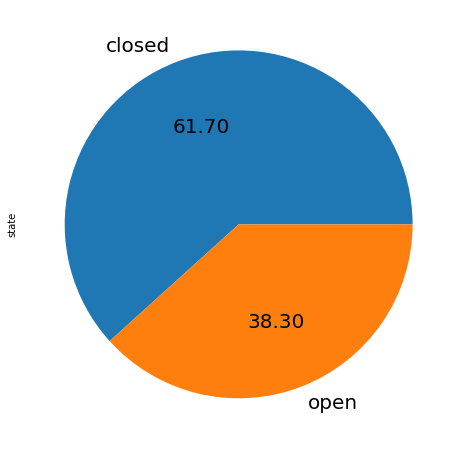

In [22]:
issues.normalize_data()
issues.show_pie('state')

c-icap                           30
mvp-icap-cloud                   30
mvp-icap-squid-cache-proxy       19
mvp-icap-service                 8 
k8-data-visualization            2 
icap-performance-tests           2 
rebuild-k8s                      1 
k8-glasswall-rebuild             1 
rebuild-k8s-filetypedetection    1 
Name: repo, dtype: int64


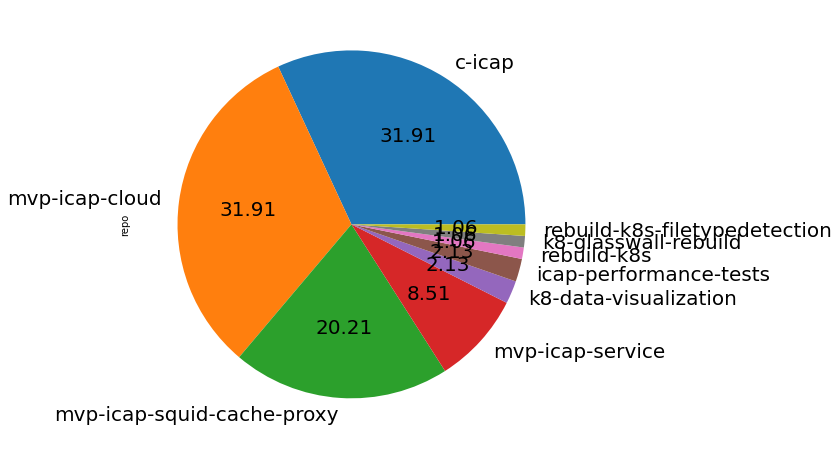

In [17]:
issues.show_pie('repo')

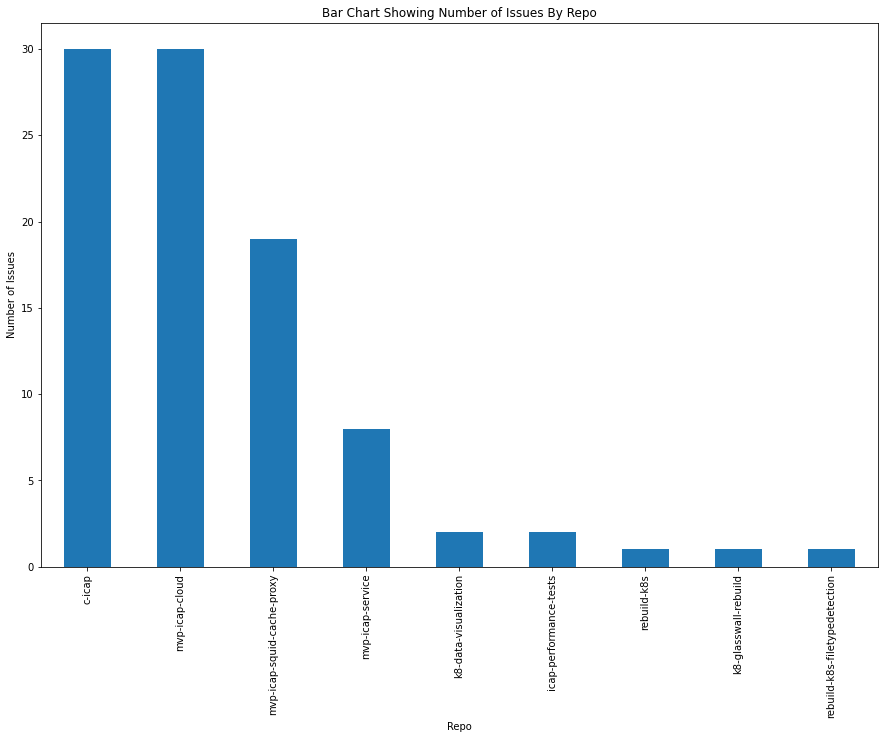

In [18]:
issues.show_bar_chart_by_repo()

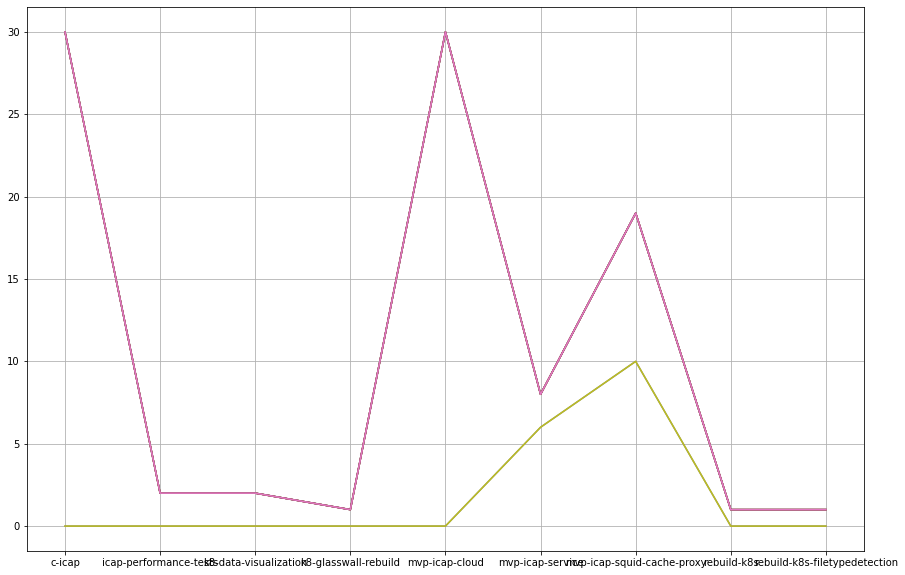

In [19]:
issues.show_grid_chart('repo')

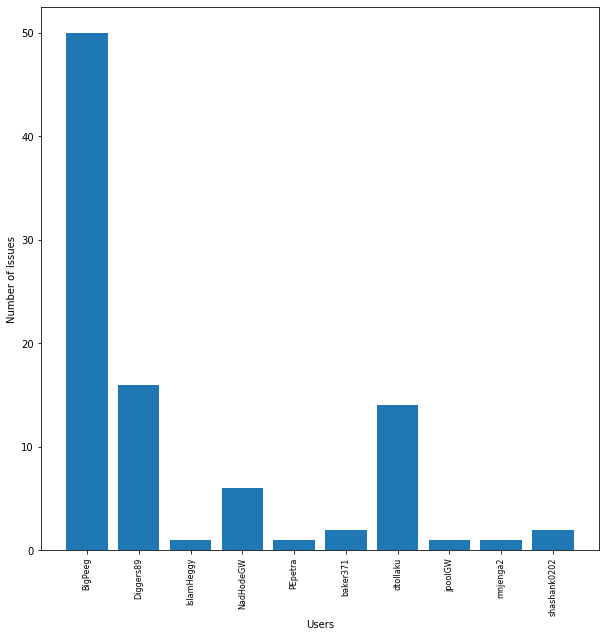

In [20]:
issues.show_bar_chart_by_user()

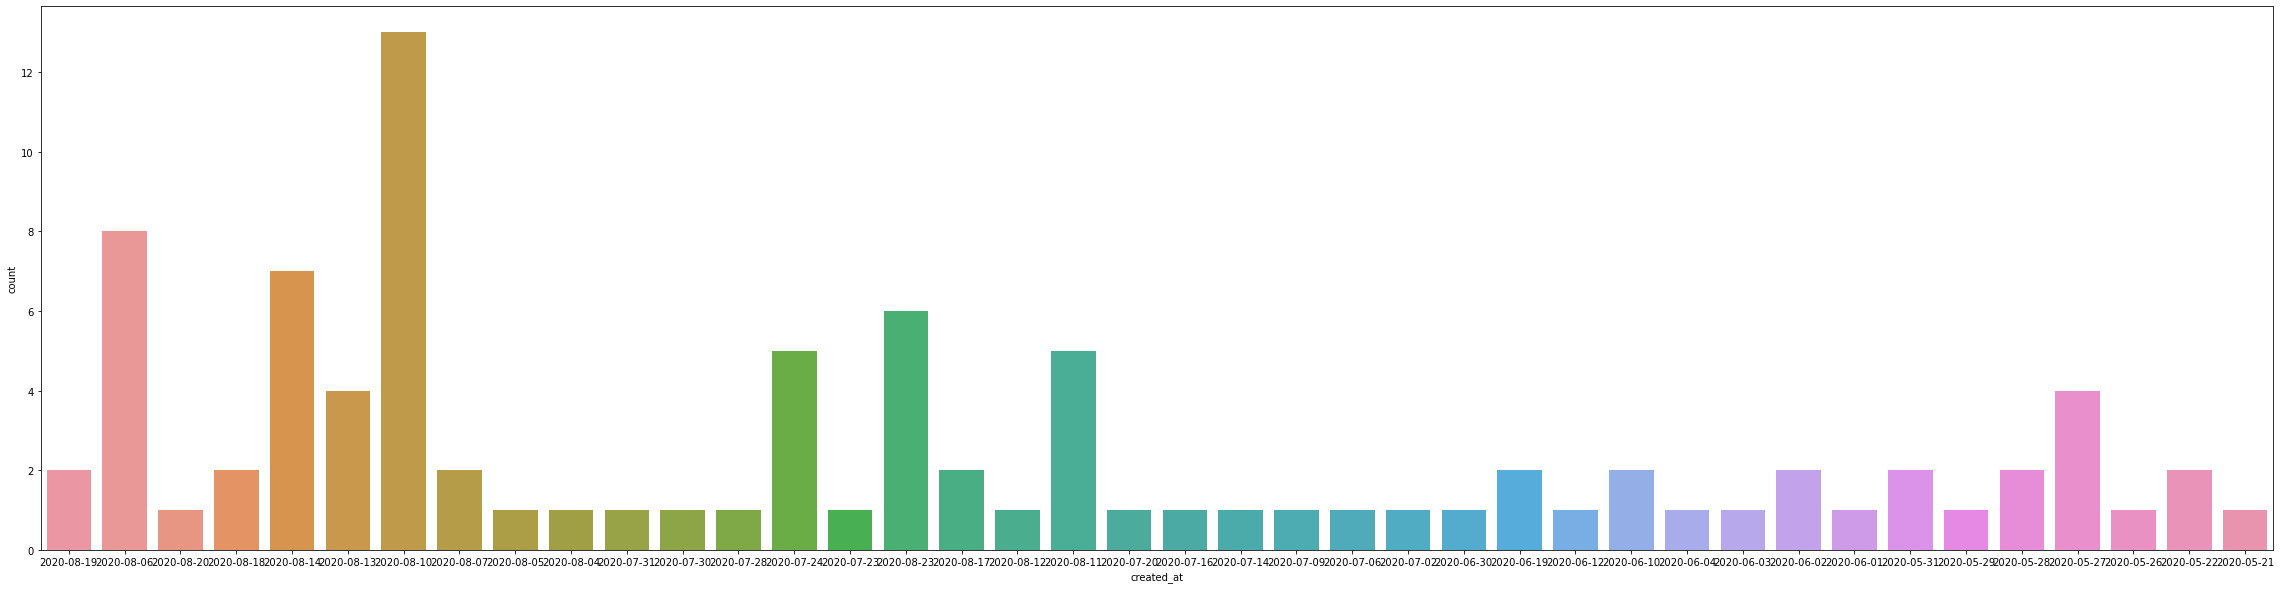

In [21]:
issues.show_bar_chart_by_date()

KeyError: 'u'

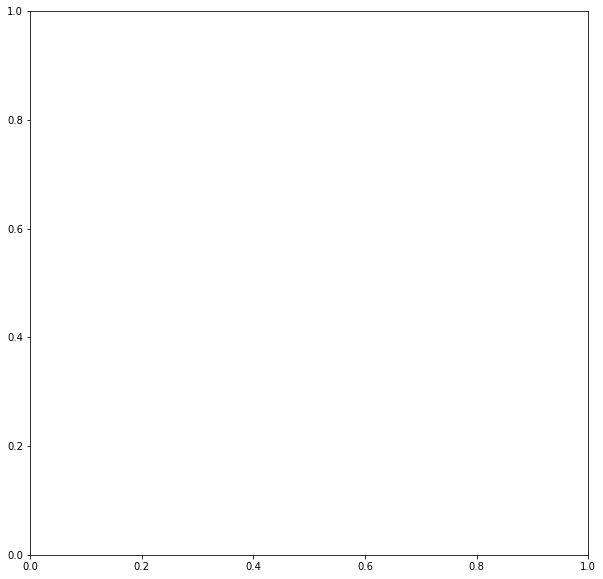

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from multiplex import drawable
viz = drawable.Drawable(plt.figure(figsize=(10, 10)))
G = nx.path_graph(5)
G.nodes['u']['name'] = 'node'
G.edges[('u', 'v')]['name'] = 'edge'
viz.draw_graph(G, edge_style={ 'color': 'C1' },
               node_style={ 'color': 'C4', 'edgecolor': 'C1', 'linewidth': 2, 's': 250 })
viz.show()

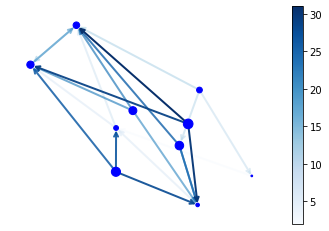

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Blues,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()